In [1]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import os
import math
import seaborn as sns
import pandas as pd

ModuleNotFoundError: No module named 'cv2'

In [11]:
data_txt = '../data/fPCA/head_a1_d0a0.txt'
data_npy = '../data/fPCA/photons.npy'

In [12]:
with open(data_txt,'r') as f:
    photons = []
    for n in range(1000000):
        l = f.readline()
        features = l.split()
        
        if features[0]!='1':
            continue

        X = float(features[2])
        Y = float(features[3])
        dX = float(features[5])
        dY = float(features[6])
        dZ = float(features[7])
        E = float(features[8])
        photon = np.asarray([E,X,Y,dX,dY,dZ],dtype=np.float32)
        photons.append(photon)
    
    photons = np.asarray(photons,dtype=np.float32)
    np.save(data_npy,photons)

In [13]:
photons = np.load(data_npy)
X = np.zeros(photons.shape,dtype=np.float32)
np.copyto(X,photons)
mean = np.mean(X,0)

for r in range(X.shape[0]):
    X[r] = X[r] - mean

print(mean)

[ 1.2611191e+00 -2.2021653e-03 -1.2078531e-01 -1.3708725e-04
 -5.1194993e-03  9.7894621e-01]


In [14]:
print(X.shape)

(995401, 6)


In [15]:
corr = np.corrcoef(np.transpose(X))
print(corr)

[[ 1.00000000e+00  9.12959160e-05  4.49810103e-03  2.38081261e-05
   6.13197700e-03  1.08354892e-01]
 [ 9.12959160e-05  1.00000000e+00  2.94137547e-04  7.83577326e-01
  -1.22163561e-03 -1.53930812e-03]
 [ 4.49810103e-03  2.94137547e-04  1.00000000e+00  3.72210850e-04
   7.70554458e-01 -1.20016905e-02]
 [ 2.38081261e-05  7.83577326e-01  3.72210850e-04  1.00000000e+00
  -7.24483855e-05 -1.38989790e-03]
 [ 6.13197700e-03 -1.22163561e-03  7.70554458e-01 -7.24483855e-05
   1.00000000e+00  3.41202343e-02]
 [ 1.08354892e-01 -1.53930812e-03 -1.20016905e-02 -1.38989790e-03
   3.41202343e-02  1.00000000e+00]]


In [16]:
from sklearn.decomposition import PCA

EXPLAINED_RATIO = 6

pca = PCA(n_components=EXPLAINED_RATIO,svd_solver = 'full')
pca.fit(X)

print(np.sum(pca.explained_variance_ratio_))
X_projected = pca.transform(X)
print(X_projected.shape)


1.0000000000000002
(995401, 6)


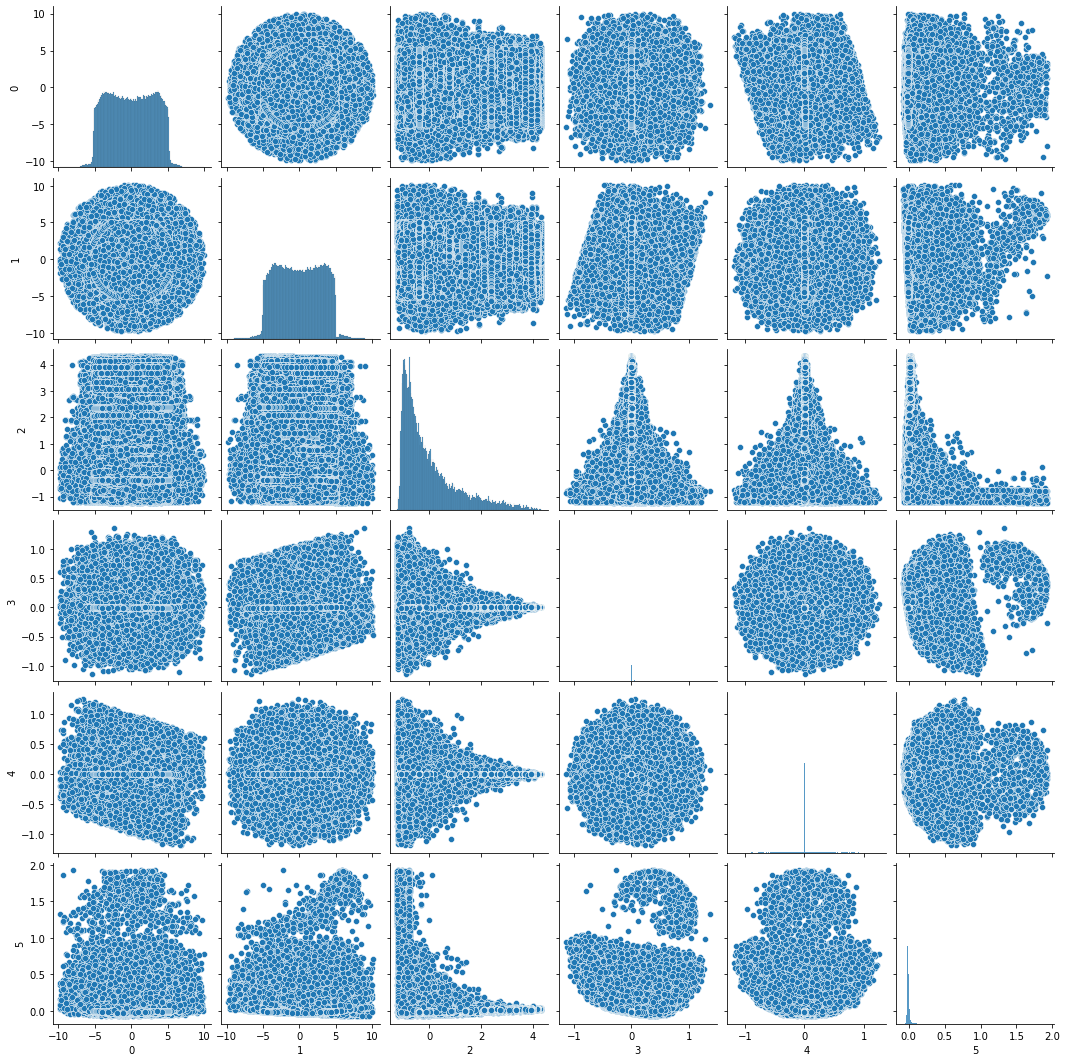

In [17]:
data = pd.DataFrame(X_projected)
g = sns.pairplot(data)

plt.show()

In [6]:
corr = np.corrcoef(np.transpose(X_projected))
print(corr)

[[ 1.00000000e+00 -1.26471265e-07 -1.79464482e-08  5.14851830e-08
  -1.88529598e-06  1.75164176e-06]
 [-1.26471265e-07  1.00000000e+00 -4.47183374e-08 -6.75922753e-07
   4.73217731e-07 -1.20856038e-06]
 [-1.79464482e-08 -4.47183374e-08  1.00000000e+00  6.39803666e-09
  -3.63402216e-09  2.73168873e-08]
 [ 5.14851830e-08 -6.75922753e-07  6.39803666e-09  1.00000000e+00
   9.91852406e-07 -2.15489418e-07]
 [-1.88529598e-06  4.73217731e-07 -3.63402216e-09  9.91852406e-07
   1.00000000e+00  5.79413100e-07]
 [ 1.75164176e-06 -1.20856038e-06  2.73168873e-08 -2.15489418e-07
   5.79413100e-07  1.00000000e+00]]


In [7]:
X_recon = pca.inverse_transform(X_projected) 

for r in range(X_recon.shape[0]):
    X_recon[r] = X_recon[r] + mean

print(X_recon.shape)  


(995330, 6)


In [8]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=6,random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(995330, 6)

In [9]:
corr = np.corrcoef(np.transpose(X_transformed))
print(corr)

[[ 1.00000000e+00 -1.05221324e-06  5.92493265e-07  9.27107534e-08
  -6.29313588e-09 -4.41276697e-07]
 [-1.05221324e-06  1.00000000e+00  1.91570559e-07 -6.03189712e-07
  -2.55969614e-06  7.18555181e-07]
 [ 5.92493265e-07  1.91570559e-07  1.00000000e+00 -9.23201342e-08
   4.21563085e-06 -4.60221123e-07]
 [ 9.27107534e-08 -6.03189712e-07 -9.23201342e-08  1.00000000e+00
  -1.42147857e-07 -1.33079048e-08]
 [-6.29313588e-09 -2.55969614e-06  4.21563085e-06 -1.42147857e-07
   1.00000000e+00  2.90772675e-05]
 [-4.41276697e-07  7.18555181e-07 -4.60221123e-07 -1.33079048e-08
   2.90772675e-05  1.00000000e+00]]


In [10]:
X_recon_fica = transformer.inverse_transform(X_transformed) 

for r in range(X_recon_fica.shape[0]):
    X_recon_fica[r] = X_recon_fica[r] + mean

print(X_recon_fica.shape)  


(995330, 6)


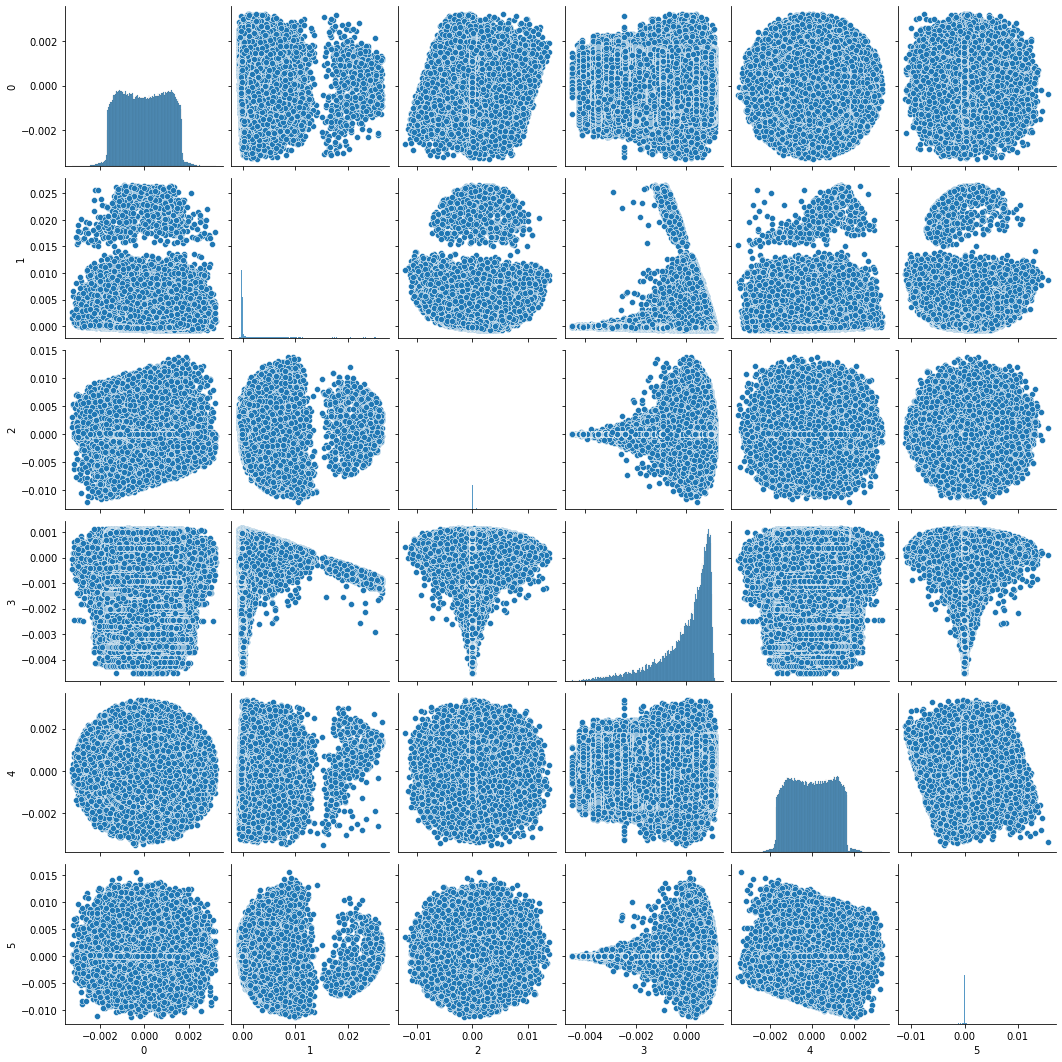

In [17]:
data = pd.DataFrame(X_transformed)
g = sns.pairplot(data)

plt.show()